# Import Modules

In [1]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
data = 'breast-cancer.csv'

dataset = pd.read_csv(data)

In [3]:
dataset.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


# Missing Data

In [4]:
dataset.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [6]:
missing = dataset['node-caps'].values.reshape(-1,1)
dataset['node-caps'] = imputer.fit_transform(missing)

In [7]:
missing1 = dataset['breast-quad'].values.reshape(-1,1)
dataset['breast-quad'] = imputer.fit_transform(missing1)

In [8]:
dataset.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

# Label Encoding

In [9]:
Names = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad']
x = dataset[Names]
y = dataset['irradiat']

In [10]:
x.head(), y.head()

(                  Class    age menopause tumor-size inv-nodes node-caps  \
 0     recurrence-events  40-49   premeno      15-19       0-2       yes   
 1  no-recurrence-events  50-59      ge40      15-19       0-2        no   
 2     recurrence-events  50-59      ge40      35-39       0-2        no   
 3  no-recurrence-events  40-49   premeno      35-39       0-2       yes   
 4     recurrence-events  40-49   premeno      30-34       3-5       yes   
 
    deg-malig breast breast-quad  
 0          3  right     left_up  
 1          1  right     central  
 2          2   left    left_low  
 3          3  right    left_low  
 4          2   left    right_up  , 0     no
 1     no
 2     no
 3    yes
 4     no
 Name: irradiat, dtype: object)

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat_mask = x.dtypes==object
cat_cols=x.columns[cat_mask].tolist()
x[cat_cols]=x[cat_cols].apply(lambda col: encoder.fit_transform(col))

In [12]:
x.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad
0,1,2,2,2,0,1,3,1,2
1,0,3,0,2,0,0,1,1,0
2,1,3,0,6,0,0,2,0,1
3,0,2,2,6,0,1,3,1,1
4,1,2,2,5,4,1,2,0,4


# One Hot Encoder

In [13]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=cat_mask,sparse=False)
x=ohe.fit_transform(x)
x

C:\Users\Vinod\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0., 1., 0., ..., 0., 0., 3.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 2.],
       ...,
       [1., 0., 0., ..., 0., 1., 2.],
       [1., 0., 0., ..., 0., 0., 2.],
       [1., 0., 0., ..., 0., 1., 3.]])

# Feature Scaling

### MinMaxScaler

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
x_train = stdscaler.fit_transform(x_train)
x_test = stdscaler.transform(x_test)

# Feature Engineering

### Binarization

In [17]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = lb.fit_transform(y)
y = np.concatenate(y, axis=0)
y

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0])

### PCA 

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_r = pca.fit_transform(x)

Text(0.5, 1.0, 'PCA')

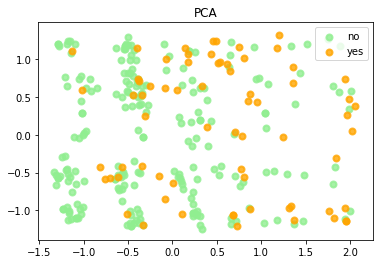

In [19]:
target_names = ['no', 'yes']

plt.figure()
colors = ['lightgreen', 'orange']

for colors, i, target_names in zip(colors, [0,1], target_names):
    plt.scatter(x_r[y==i,0], x_r[y==i,1], color=colors, alpha=0.8,lw=2,label=target_names)

plt.legend(scatterpoints=1)
plt.title("PCA")

In [20]:
#Variance explained after applying PCA

pca.explained_variance_ratio_

array([0.1618124 , 0.13321725])

In [21]:
pca.explained_variance_ratio_.sum()

# Notes
## PCA is not required here, as only 29.5% varoance is explained 

0.2950296440571055